In [15]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_excel('/content/Concrete_Data.xls')

# Вывод первых 5 строк
print(data.head())

# Вывод названий столбцов
print(data.columns)

# Проверка на пропущенные значения
print(data.isnull().sum())

print(data.describe())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

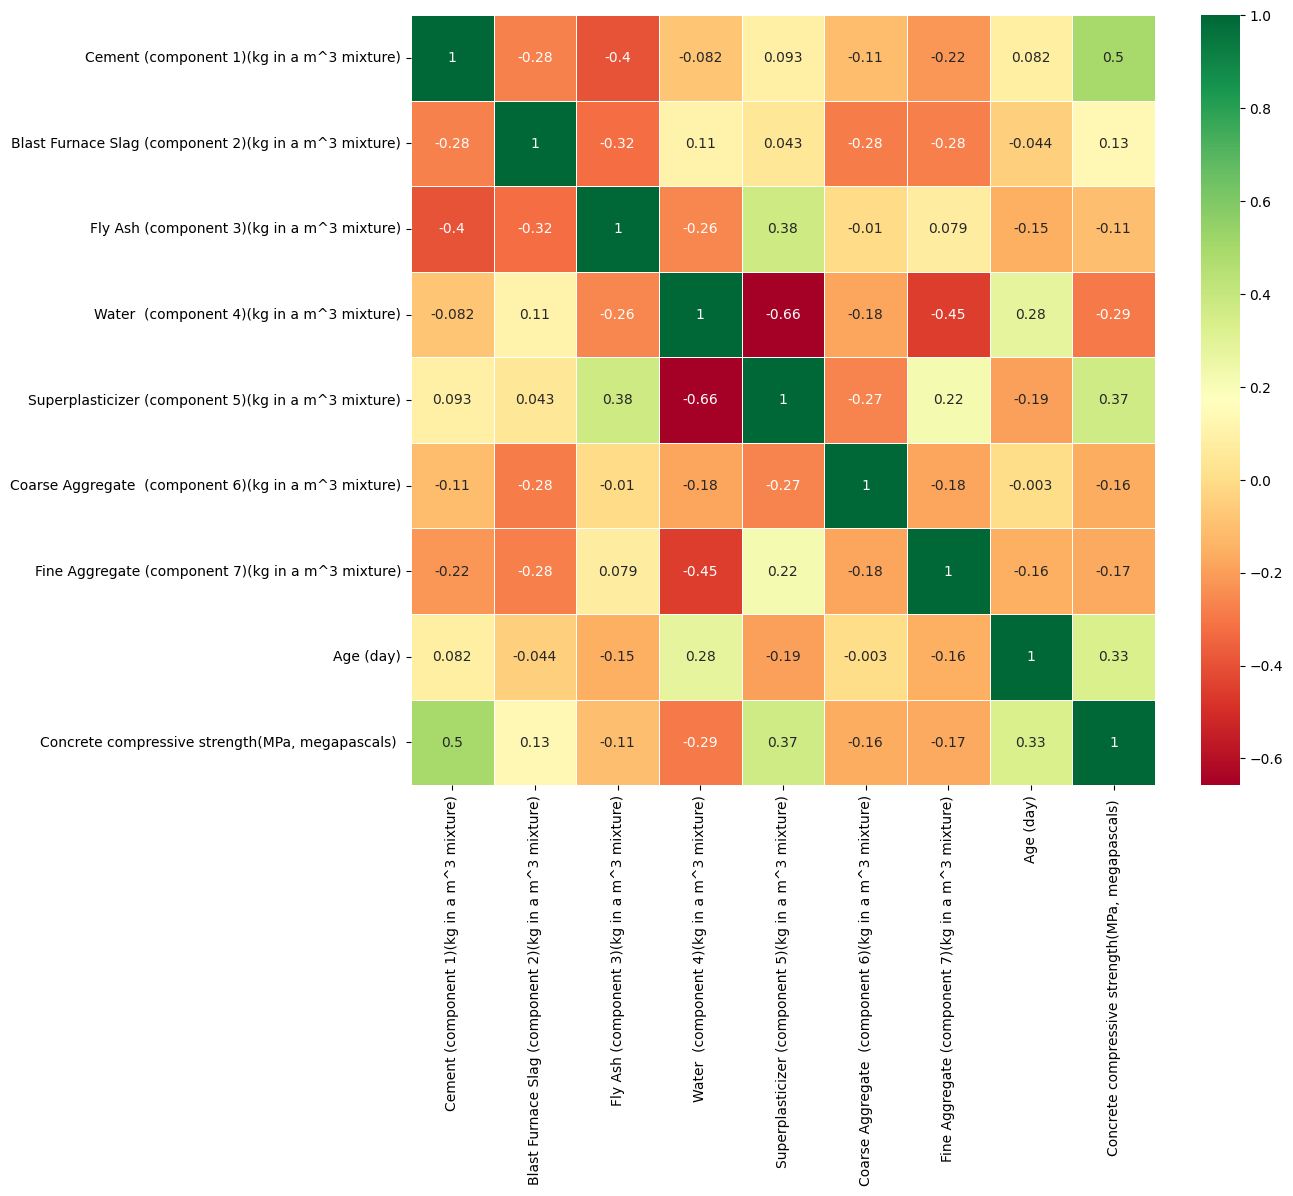

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вывод матрицы корреляции
corr_matrix = data.corr()

# Визуализируем матрицу корреляции с помощью heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

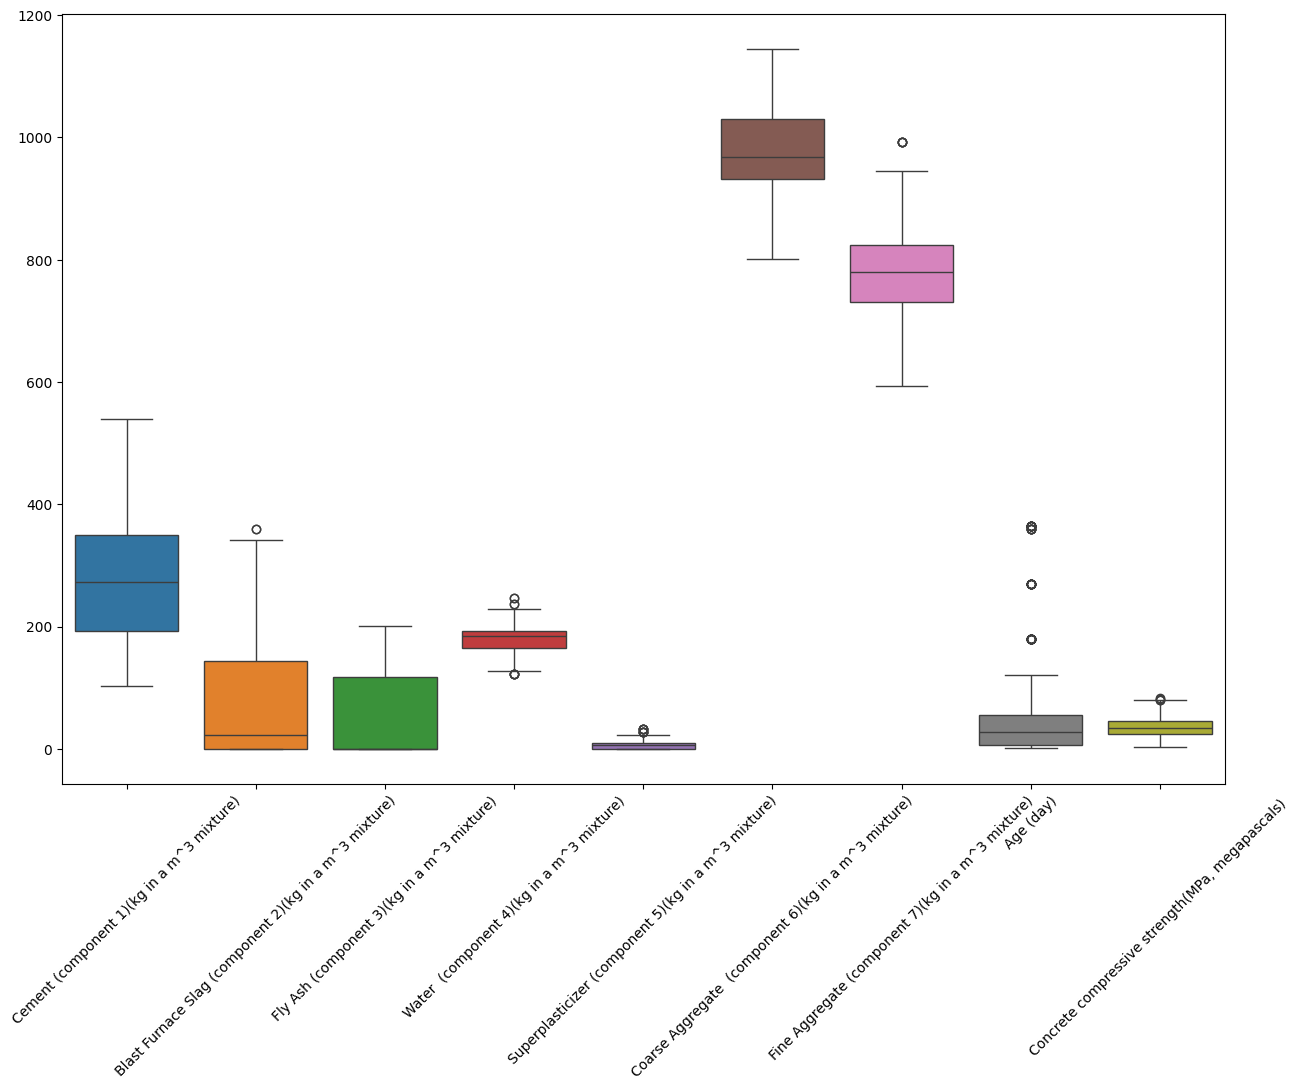

In [17]:
# Создание боксплотов для каждого признака
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [12]:
import numpy as np
# Замена выбросов на медиану для каждого признака
for column in data.columns:
    data[column] = data[column].replace(np.inf, np.nan).replace(-np.inf, np.nan).fillna(data[column].median())


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# Решающее дерево
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)

# Случайный лес
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# Градиентный бустинг
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Linear Regression R2: {r2_lr}')
print(f'Decision Tree R2: {r2_dt}')
print(f'Random Forest R2: {r2_rf}')
print(f'Gradient Boosting R2: {r2_gb}')

Linear Regression R2: 0.627541605542902
Decision Tree R2: 0.8177988384610836
Random Forest R2: 0.8770418063047124
Gradient Boosting R2: 0.8819860610357787


Linear Regression R2: 0.627541605542902

Decision Tree R2: 0.8111150254881605

Random Forest R2: 0.8817737542932786

Gradient Boosting R2: 0.8808743245644816         
данные до усреднения выбросов



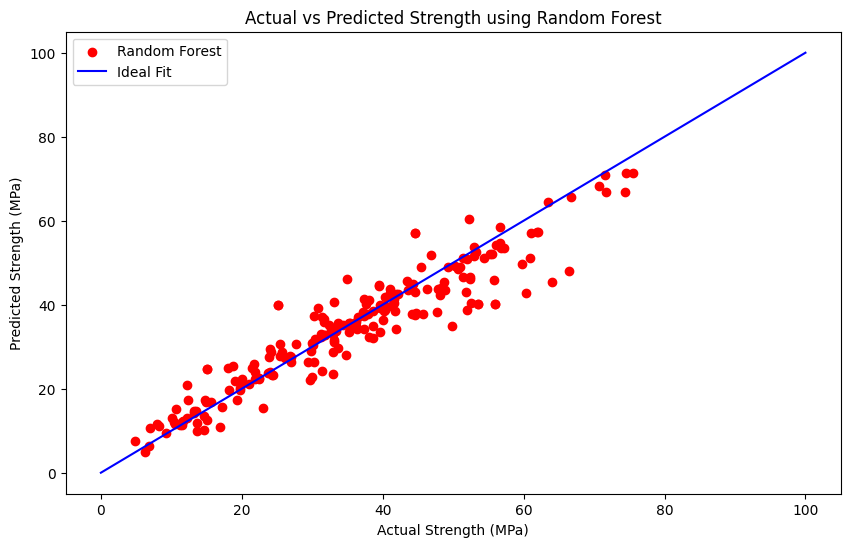

In [5]:
import matplotlib.pyplot as plt

# Визуализируем предсказания Случайного леса
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, c='r', label='Random Forest')
plt.plot([0, 100], [0, 100], c='b', label='Ideal Fit')
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Actual vs Predicted Strength using Random Forest')
plt.legend()
plt.show()